# import data

In [1]:
import pandas as pd
#import os
#cwd = os.getcwd()
#unpickled_df = pd.read_pickle(cwd + '/upworthy-project' + "/dummy.pkl")
data = pd.read_pickle('upworthy_topics.pkl')
data

,clickability_test_id,headline,lede,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,...,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24
0,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",0.094635,0.0,0.0,0.000000,0.000000,0.0,0.587859,...,0.0,0.175553,0.000000,0.192749,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",0.094750,0.0,0.0,0.000000,0.000000,0.0,0.577575,...,0.0,0.272812,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",0.000000,0.0,0.0,0.000000,0.000000,0.0,0.577071,...,0.0,0.175319,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.405348,0.223877,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.405585,0.223808,0.000000,0.0,0.000000,0.000000,0.000000,0.272571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22661,546d373426714cde76000018,5 Reasons You May Need To Plan A Vacation - Ri...,<p>Travel isn't just a luxury or indulgence an...,0.088582,0.0,0.0,0.103391,0.176959,0.0,0.088641,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
22662,546d373426714cde76000018,The Next Time You Encounter A Small Minded Big...,<p>Travel isn't just a luxury or indulgence an...,0.000000,0.0,0.0,0.338437,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.383677,0.072311,0.0,0.000000,0.000000,0.108121,0.000000
22663,546d373426714cde76000018,I've Never Wanted To Buy A Plane Ticket More T...,<p>Travel isn't just a luxury or indulgence an...,0.000000,0.0,0.0,0.191190,0.000000,0.0,0.081574,...,0.0,0.252118,0.135159,0.000000,0.031409,0.0,0.000000,0.054565,0.000000,0.063721
22664,54b6a21662646300182c0000,3 Ladies Having Too Much Fun At The Epicenter ...,<p>The Frackettes want to remind you of one im...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.260409,0.185166,0.071391,0.000000,0.0,0.082674,0.000000,0.000000,0.000000


In [3]:
data.columns[3:]

Index(['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11',
       'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17',
       'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23',
       'topic_24'],
      dtype='object')

In [4]:
X = data[3:] #features

# predict raw CTR

In [8]:
# The y data is the CTR_within, our predicition metric 
y=data['CTR']  # Labels # predict CTR and CTR_within 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [11]:
# use the RandomForestREGRESSOR not the RandomForestCLASSIFIER for continuous data. Otherwise, it will raise an error
from sklearn.ensemble import RandomForestRegressor

# what should n_estimators be? 
regr=RandomForestRegressor(n_estimators = 100, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
regr.fit(X_train,y_train)

y_pred=regr.predict(X_test)

In [12]:
# Make prediction
#predictions = regr.predict(X_test)
#predictions


array([0.01445219, 0.01840091, 0.00802058, ..., 0.01815306, 0.00375727,
       0.02322028])

In [13]:
result = X_test
result['CTR_within'] = y_test
result['CTR_within_prediction'] = predictions.tolist()
result.head()

<ipython-input-13-92b37b242e76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['CTR_within'] = y_test
<ipython-input-13-92b37b242e76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['CTR_within_prediction'] = predictions.tolist()


,uppercase_n,nltk_stopwords_n,lower_words_nltk_mean_len,stop_word_ratio,n_raps,raps_presence,uppercase_n,nouns_n,verbs_n,adjs_n,...,dems_n,nouns_ratio,verbs_ratio,adjs_ratio,advs_ratio,dems_presence,question_marks,exclamation_marks,CTR_within,CTR_within_prediction
12174,0,4,4.400000,0.400000,1,1,0,2,3,1,...,1,0.200000,0.300000,0.100000,0.000000,1,0,0,0.011062,0.014452
2944,0,11,3.235294,0.647059,0,0,0,3,6,2,...,0,0.176471,0.352941,0.117647,0.117647,0,0,0,0.020555,0.018401
3610,0,9,4.000000,0.562500,0,0,0,3,4,1,...,1,0.187500,0.250000,0.062500,0.000000,1,0,0,0.008264,0.008021
18401,0,7,3.842105,0.368421,0,0,0,6,2,1,...,0,0.315789,0.105263,0.052632,0.052632,0,1,0,0.004768,0.012810
20196,0,5,5.187500,0.312500,0,0,0,6,1,3,...,0,0.375000,0.062500,0.187500,0.000000,0,0,0,0.014690,0.018772


In [14]:
X_test

,uppercase_n,nltk_stopwords_n,lower_words_nltk_mean_len,stop_word_ratio,n_raps,raps_presence,uppercase_n,nouns_n,verbs_n,adjs_n,...,dems_n,nouns_ratio,verbs_ratio,adjs_ratio,advs_ratio,dems_presence,question_marks,exclamation_marks,CTR_within,CTR_within_prediction
12174,0,4,4.400000,0.400000,1,1,0,2,3,1,...,1,0.200000,0.300000,0.100000,0.000000,1,0,0,0.011062,0.014452
2944,0,11,3.235294,0.647059,0,0,0,3,6,2,...,0,0.176471,0.352941,0.117647,0.117647,0,0,0,0.020555,0.018401
3610,0,9,4.000000,0.562500,0,0,0,3,4,1,...,1,0.187500,0.250000,0.062500,0.000000,1,0,0,0.008264,0.008021
18401,0,7,3.842105,0.368421,0,0,0,6,2,1,...,0,0.315789,0.105263,0.052632,0.052632,0,1,0,0.004768,0.012810
20196,0,5,5.187500,0.312500,0,0,0,6,1,3,...,0,0.375000,0.062500,0.187500,0.000000,0,0,0,0.014690,0.018772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16025,0,7,4.000000,0.437500,0,0,0,5,3,1,...,0,0.312500,0.187500,0.062500,0.125000,0,0,0,0.020150,0.016312
14839,0,6,4.500000,0.500000,0,0,0,3,3,2,...,1,0.250000,0.250000,0.166667,0.083333,1,0,0,0.012130,0.012825
18354,0,9,4.333333,0.500000,0,0,0,3,4,3,...,1,0.166667,0.222222,0.166667,0.055556,1,0,0,0.005625,0.018153
17931,0,5,4.000000,0.625000,0,0,0,1,2,0,...,0,0.125000,0.250000,0.000000,0.125000,0,0,0,0.003473,0.003757


In [15]:
X_test['CTR_within'].corr(X_test['CTR_within_prediction'])

0.7214571060297447

suddenly, these correlate quite well!
seems like CTR is easier to predict that CTR_within. Why? 

In [16]:
# THIS LOOKS INCREDIBLY BAD. WHY IS THE OVERALL PERFORMANCE SO GOOD?

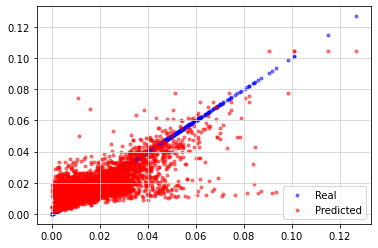

In [17]:
# Import library for visualization
import matplotlib.pyplot as plt

# Define x axis
x_axis = X_test.CTR_within

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

In [18]:
# this seems like it always just predics 0?

In [19]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', (mae, 2))
print('Mean Squared Error:', (mse, 2))
print('R-squared scores:', (r2, 2))

Mean Absolute Error: (0.005807834364294974, 2)
Mean Squared Error: (7.233030673876607e-05, 2)
R-squared scores: (0.512657733143167, 2)


this is so weird. I suppose because all is in the .03 and -.03 range? these are weirs values between -1 and 1. squares and sqaureroots work weirdly here... I uess I can't really interpret them

In [20]:
0.03 * 0.03

0.0009

multiplying these values gets smaller values...

In [21]:
# Get features list
characteristics = X.columns
characteristics

Index(['uppercase_n', 'nltk_stopwords_n', 'lower_words_nltk_mean_len',
       'stop_word_ratio', 'n_raps', 'raps_presence', 'uppercase_n', 'nouns_n',
       'verbs_n', 'adjs_n', 'advs_n', 'w_words_n', 'dems_n', 'nouns_ratio',
       'verbs_ratio', 'adjs_ratio', 'advs_ratio', 'dems_presence',
       'question_marks', 'exclamation_marks'],
      dtype='object')

In [22]:
# Get the variables importances, sort them, and print the result
importances = list(regr.feature_importances_)
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];

Variable: lower_words_nltk_mean_len Importance: 0.21
Variable: verbs_ratio          Importance: 0.11
Variable: stop_word_ratio      Importance: 0.1
Variable: nouns_ratio          Importance: 0.1
Variable: adjs_ratio           Importance: 0.08
Variable: advs_ratio           Importance: 0.08
Variable: nltk_stopwords_n     Importance: 0.05
Variable: nouns_n              Importance: 0.05
Variable: verbs_n              Importance: 0.04
Variable: w_words_n            Importance: 0.04
Variable: dems_n               Importance: 0.03
Variable: adjs_n               Importance: 0.02
Variable: advs_n               Importance: 0.02
Variable: uppercase_n          Importance: 0.01
Variable: n_raps               Importance: 0.01
Variable: raps_presence        Importance: 0.01
Variable: uppercase_n          Importance: 0.01
Variable: dems_presence        Importance: 0.01
Variable: question_marks       Importance: 0.01
Variable: exclamation_marks    Importance: 0.0


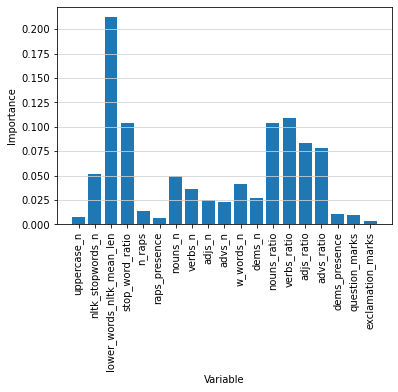

In [23]:
# Visualize the variables importances
plt.bar(characteristics, importances, orientation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.grid(axis = 'y', color = '#D3D3D3', linestyle = 'solid')
plt.show()

seems like the effective linguistic characteristics are way more subtle than the ones you first think of:
    it's not about calling you out, shouting (UPPERCASE!), or forward reference

<ipython-input-86-edf8755a2d80>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['CTR_within'] = y_test
<ipython-input-86-edf8755a2d80>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['CTR_within_prediction'] = predictions.tolist()


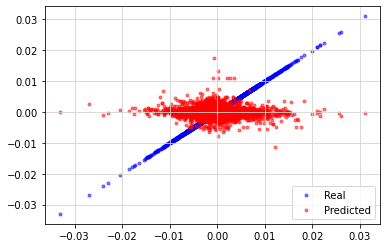

In [86]:
X= data[['lower_words_nltk_mean_len', 'stop_word_ratio']]  # Features
y=data['CTR_within']  # Labels


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
regr=RandomForestRegressor(n_estimators = 100, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
regr.fit(X_train,y_train)

y_pred=regr.predict(X_test)

# Make prediction
predictions = regr.predict(X_test)
predictions

result = X_test
result['CTR_within'] = y_test
result['CTR_within_prediction'] = predictions.tolist()
result.head()


# Import library for visualization
import matplotlib.pyplot as plt

# Define x axis
x_axis = X_test.CTR_within

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

It seems like sentence numbers actually matters, and punctuation and reader-adressing also does.
how can the number of raps matter, but the presence of raps matters less than the number of raps? That is weird... 
superlatives don't seem to matter. 
Perhaps this is an early/late selection thing? We process surface features earlier?  
This would mean you should invest in surface characteristics (like ounctuaion and upper case, befoer you actually care for the semantics). 

this borrows code from: 
    https://www.datacareer.de/blog/random-forest-in-python-with-scikit-learn/

# predict CTR_within

In [29]:
data

,clickability_test_id,headline,eyecatcher_id,CTR,CTR_story_mean,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,pos_tags,pos_tags_word_level,...,raps,n_raps,raps_presence,dems,dems_n,dems_presence,uppercase_n,sents,question_marks,exclamation_marks
0,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,0.049148,0.042171,"[They're, Being, Called, ', Walmart's, Worst, ...","[they're, being, called, walmart's, worst, nig...",13,"[(They're, NNP), (Being, NNP), (Called, NNP), ...","[(they're, NN), (being, VBG), (called, VBN), (...",...,[],0,0,[],0,0,0,2,0,0
1,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,0.040224,0.042171,"[They're, Being, Called, ', Walmart's, Worst, ...","[they're, being, called, walmart's, worst, nig...",13,"[(They're, NNP), (Being, NNP), (Called, NNP), ...","[(they're, NN), (being, VBG), (called, VBN), (...",...,[],0,0,[],0,0,0,2,0,0
2,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,0.035576,0.042171,"[They're, Being, Called, ', Walmart's, Worst, ...","[they're, being, called, walmart's, worst, nig...",13,"[(They're, NNP), (Being, NNP), (Called, NNP), ...","[(they're, NN), (being, VBG), (called, VBN), (...",...,[],0,0,[],0,0,0,2,0,0
3,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,0.043738,0.042171,"[They're, Being, Called, ', Walmart's, Worst, ...","[they're, being, called, walmart's, worst, nig...",13,"[(They're, NNP), (Being, NNP), (Called, NNP), ...","[(they're, NN), (being, VBG), (called, VBN), (...",...,[],0,0,[],0,0,0,2,0,0
4,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546bc55335992b86c8000043,0.025525,0.026187,"[This, Is, What, Sexism, Against, Men, Sounds,...","[this, is, what, sexism, against, men, sounds,...",8,"[(This, DT), (Is, VBZ), (What, WP), (Sexism, N...","[(this, DT), (is, VBZ), (what, WP), (sexism, N...",...,[],0,0,[this],1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22661,546d082afd36176c99000049,"What Sexism Against Men Looks Like, With Your ...",546bc55335992b614b000046,0.017954,0.018455,"[What, Sexism, Against, Men, Looks, Like, ,, W...","[what, sexism, against, men, looks, like, with...",12,"[(What, WP), (Sexism, NNP), (Against, NNP), (M...","[(what, WP), (sexism, NN), (against, IN), (men...",...,[your],1,1,[],0,0,0,1,0,0
22662,546c503abadeb51585000003,"When We Were Young, We Were Taught That Cops W...",546c567f545240b352000009,0.004948,0.008233,"[When, We, Were, Young, ,, We, Were, Taught, T...","[when, we, were, young, we, were, taught, that...",18,"[(When, WRB), (We, PRP), (Were, NNP), (Young, ...","[(when, WRB), (we, PRP), (were, VBD), (young, ...",...,[you],1,1,"[that, that]",2,1,0,2,1,0
22663,546c503abadeb51585000003,An Artist Animates The Ugly Truth We Should Al...,546c567f545240b352000009,0.009219,0.008233,"[An, Artist, Animates, The, Ugly, Truth, We, S...","[an, artist, animates, the, ugly, truth, we, s...",16,"[(An, DT), (Artist, NNP), (Animates, NNPS), (T...","[(an, DT), (artist, NN), (animates, VBZ), (the...",...,[],0,0,[],0,0,0,2,0,0
22664,546c503abadeb51585000003,Ferguson Has Taught Us Many Things. Here's The...,546c567f545240b352000009,0.007845,0.008233,"[Ferguson, Has, Taught, Us, Many, Things, ., H...","[ferguson, has, taught, us, many, things, here...",11,"[(Ferguson, NNP), (Has, NNP), (Taught, NNP), (...","[(ferguson, NN), (has, VBZ), (taught, VBN), (u...",...,[],0,0,[],0,0,0,2,0,0


In [28]:
# X= data[['uppercase_n', etc.]]  # Features
y=data['CTR_w']  # Labels

KeyError: 'CTR_w'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# use the RandomForestREGRESSOR not the RandomForestCLASSIFIER for continuous data. Otherwise, it will raise an error

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
regr=RandomForestRegressor(n_estimators = 100, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
regr.fit(X_train,y_train)

y_pred=regr.predict(X_test)

# Make prediction
predictions = regr.predict(X_test)


result = X_test
result['CTR_within'] = y_test
result['CTR_within_prediction'] = predictions.tolist()
result.head()

In [27]:
X_test['CTR_within'].corr(X_test['CTR_within_prediction'])

0.7214571060297447

In [ ]:

# Import library for visualization
import matplotlib.pyplot as plt

# Define x axis
x_axis = X_test.CTR_within

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', (mae, 2))
print('Mean Squared Error:', (mse, 2))
print('R-squared scores:', (r2, 2))

In [ ]:
# Get features list
characteristics = X.columns
characteristics

# Get the variables importances, sort them, and print the result
importances = list(regr.feature_importances_)
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];

# Visualize the variables importances
plt.bar(characteristics, importances, orientation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.grid(axis = 'y', color = '#D3D3D3', linestyle = 'solid')
plt.show()

In [92]:
import numpy as np

In [93]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.00262934145896206
Mean Squared Error: 1.4790797348686348e-05
Root Mean Squared Error: 0.0038458805686976743


In [94]:
# WHY DOES THIS LOOK SO GOOD???

In [47]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: continuous is not supported

what are these values? like max_depth. I need to find out the "out-of-the_box" model

In [ ]:
# Train the model
regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
regr.fit(X_train, y_train.values.ravel())